In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("./data/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder().fit(df['class'])
df['class'] = le.transform(df['class'])
le.classes_

array(['e', 'p'], dtype=object)

In [5]:
indept = df.drop('class', axis=1) 
df = pd.get_dummies(df, columns=indept.columns, drop_first=True)
df.head()

,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,False,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,0,False,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
2,0,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,0,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [6]:
df = df.astype(int)

In [7]:
correlations = df.corr()['class'].drop('class')  
top_25_features = correlations.abs().sort_values(ascending=False).head(25)

In [8]:
selected_columns = top_25_features.index.tolist() + ['class'] 
new_df = df[selected_columns]

In [9]:
X = new_df.drop("class", axis= 1)
y = new_df["class"]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (6499, 25) (6499,)
Test set shape: (1625, 25) (1625,)


# Logistic Reg

In [14]:
clf = LogisticRegression(max_iter=200, random_state=42)

In [15]:
clf.fit(X, y)

LogisticRegression(max_iter=200, random_state=42)

In [111]:
from sklearn.metrics import precision_score, ConfusionMatrixDisplay, f1_score, confusion_matrix

In [112]:
precision_score(clf.predict(X), y,average='binary')

np.float64(0.9622063329928499)

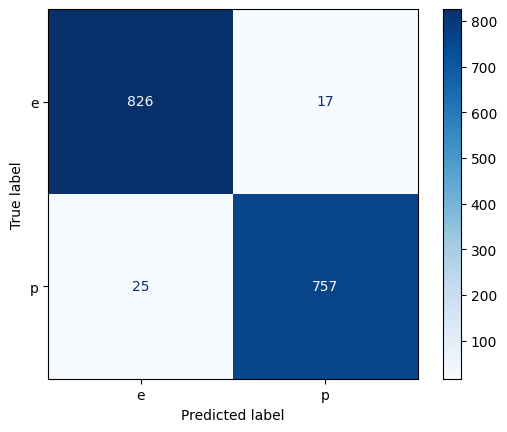

In [113]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=le.classes_, cmap='Blues')
plt.show()

# Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score

In [22]:
clf = LogisticRegression(max_iter=200, random_state=42)

In [23]:
precision_scorer = make_scorer(precision_score, average='binary')

In [28]:
# Perform cross-validation with precision as the scoring metric
precision_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring=precision_scorer)

# Output the precision scores for each fold
# print("Precision for each fold:", precision_scores)
print("Average precision:", precision_scores.mean())

Average precision: 0.9852736216658131


## Stratified K Fold

In [121]:
from sklearn.model_selection import StratifiedKFold

In [122]:
model = LogisticRegression(max_iter=200, random_state=42)

# Define StratifiedKFold cross-validation (3-fold cross-validation)
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Store accuracies for each fold
fold_accuracies = []

In [126]:
X = X.to_numpy()
y = y.to_numpy()
for train_index, test_index in skf.split(X, y):
    # Split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = precision_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

In [127]:
average_accuracy = np.mean(fold_accuracies)
print("Cross-validation accuracies:", fold_accuracies)
print("Precision accuracy:", average_accuracy)

Cross-validation accuracies: [np.float64(0.9820031298904538), np.float64(0.9882445141065831), np.float64(0.983503534956795)]
Precision accuracy: 0.9845837263179439
